https://github.com/alessiobernardo/River_Hands-on_ContinualAI_Unconference/tree/main

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier
import numpy as np

In [24]:
path= '../data/bus_stop_times_feature_added_all.csv'
df = pd.read_csv(path)
df = df[df['week_no'] < 25]

def condition(x):
    if x == 0:
        return 0
    else:
        return 1

df['dwell/pass'] = df['dwell_time_in_seconds'].apply(condition)

In [25]:
df = df[['deviceid',
         'bus_stop',
         'week_no',
         'day_of_week',
         'Sunday/holiday',
         'saturday',
         'time_of_day',
         'dt(w-1)',
         'dt(w-2)',
         'dt(w-3)',
         'dt(t-1)',
         'dt(t-2)',
         'dt(n-1)',
         'dt(n-2)',
         'dt(n-3)',
         'temp', 
         'precip',
         'rt(n-1)',
         'dwell/pass']]
df

,deviceid,bus_stop,week_no,day_of_week,Sunday/holiday,saturday,time_of_day,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),temp,precip,rt(n-1),dwell/pass
0,262,101,1,4,0,0,6.50,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,20.0,0.000,69.0,1
1,262,102,1,4,0,0,6.75,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,20.0,0.000,210.0,0
2,262,103,1,4,0,0,6.75,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,20.0,0.000,496.0,1
3,262,104,1,4,0,0,6.75,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,20.0,0.000,195.0,0
4,262,105,1,4,0,0,6.75,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,20.0,0.000,97.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62820,121,110,24,6,1,0,14.25,21.0,21.0,21.0,21.0,21.0,15.0,15.0,15.0,23.7,6.742,190.0,1
62821,121,111,24,6,1,0,14.25,10.0,10.0,10.0,10.0,10.0,15.0,15.0,15.0,23.7,6.742,165.0,1
62822,121,112,24,6,1,0,14.25,8.0,8.0,8.0,8.0,8.0,15.0,15.0,15.0,23.7,6.742,177.0,1
62823,121,113,24,6,1,0,14.25,19.0,19.0,19.0,19.0,15.0,6.0,15.0,15.0,23.7,6.742,168.0,1


<Axes: xlabel='dwell/pass', ylabel='count'>

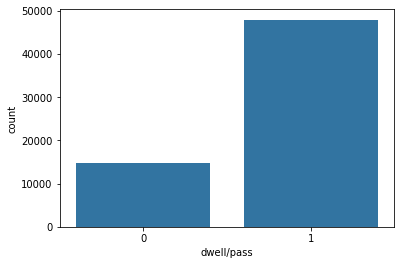

In [26]:
sns.countplot(x="dwell/pass", data=df)

<hr>

In [27]:
from river.stream import iter_pandas
from river.metrics import Accuracy,BalancedAccuracy,CohenKappa,F1
from river.metrics.base import Metrics
from river.utils import Rolling
from river.evaluate import progressive_val_score

In [43]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

Naïve Bayes

In [29]:
from river.naive_bayes import GaussianNB

model = GaussianNB()
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 52.85%, BalancedAccuracy: 64.22%, F1: 59.09%, CohenKappa: 17.25%
[6,000] Accuracy: 52.03%, BalancedAccuracy: 64.55%, F1: 58.33%, CohenKappa: 16.93%
[9,000] Accuracy: 52.86%, BalancedAccuracy: 65.13%, F1: 58.53%, CohenKappa: 18.25%
[12,000] Accuracy: 52.86%, BalancedAccuracy: 64.89%, F1: 58.10%, CohenKappa: 18.34%
[15,000] Accuracy: 53.23%, BalancedAccuracy: 65.30%, F1: 58.13%, CohenKappa: 19.07%
[18,000] Accuracy: 53.58%, BalancedAccuracy: 65.44%, F1: 58.16%, CohenKappa: 19.58%
[21,000] Accuracy: 53.32%, BalancedAccuracy: 65.38%, F1: 58.06%, CohenKappa: 19.28%
[24,000] Accuracy: 52.92%, BalancedAccuracy: 65.25%, F1: 57.95%, CohenKappa: 18.76%
[27,000] Accuracy: 52.72%, BalancedAccuracy: 65.35%, F1: 57.95%, CohenKappa: 18.58%
[30,000] Accuracy: 52.68%, BalancedAccuracy: 65.38%, F1: 57.88%, CohenKappa: 18.60%
[33,000] Accuracy: 52.62%, BalancedAccuracy: 65.29%, F1: 57.80%, CohenKappa: 18.50%
[36,000] Accuracy: 52.52%, BalancedAccuracy: 65.19%, F1: 57.69%, CohenKappa: 18

Accuracy: 52.76%, BalancedAccuracy: 64.98%, F1: 57.43%, CohenKappa: 18.65%

In [ ]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

K-Nearest Neighbors

In [31]:
from river.neighbors import KNNClassifier

model = KNNClassifier(n_neighbors=5)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 78.13%, BalancedAccuracy: 61.53%, F1: 86.67%, CohenKappa: 26.70%
[6,000] Accuracy: 78.41%, BalancedAccuracy: 61.08%, F1: 86.94%, CohenKappa: 25.64%
[9,000] Accuracy: 77.44%, BalancedAccuracy: 61.38%, F1: 86.16%, CohenKappa: 25.98%
[12,000] Accuracy: 76.91%, BalancedAccuracy: 61.37%, F1: 85.73%, CohenKappa: 25.93%
[15,000] Accuracy: 76.51%, BalancedAccuracy: 61.53%, F1: 85.39%, CohenKappa: 26.13%
[18,000] Accuracy: 75.84%, BalancedAccuracy: 61.46%, F1: 84.86%, CohenKappa: 25.79%
[21,000] Accuracy: 76.08%, BalancedAccuracy: 61.32%, F1: 85.08%, CohenKappa: 25.55%
[24,000] Accuracy: 76.65%, BalancedAccuracy: 61.47%, F1: 85.52%, CohenKappa: 25.94%
[27,000] Accuracy: 77.10%, BalancedAccuracy: 61.48%, F1: 85.88%, CohenKappa: 26.06%
[30,000] Accuracy: 77.16%, BalancedAccuracy: 61.47%, F1: 85.93%, CohenKappa: 26.09%
[33,000] Accuracy: 77.11%, BalancedAccuracy: 61.51%, F1: 85.88%, CohenKappa: 26.13%
[36,000] Accuracy: 77.13%, BalancedAccuracy: 61.49%, F1: 85.90%, CohenKappa: 26

Accuracy: 76.35%, BalancedAccuracy: 61.82%, F1: 85.23%, CohenKappa: 26.55%

In [ ]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

Logistic Regression (SGD Optimizer)

In [44]:
from river import linear_model
from river import optim

optimizer = optim.SGD(lr=0.01)
model = linear_model.LogisticRegression(optimizer)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 71.83%, BalancedAccuracy: 58.93%, F1: 81.94%, CohenKappa: 17.98%
[6,000] Accuracy: 73.23%, BalancedAccuracy: 59.86%, F1: 83.02%, CohenKappa: 19.84%
[9,000] Accuracy: 73.09%, BalancedAccuracy: 61.11%, F1: 82.69%, CohenKappa: 22.32%
[12,000] Accuracy: 72.82%, BalancedAccuracy: 61.62%, F1: 82.34%, CohenKappa: 23.31%
[15,000] Accuracy: 72.50%, BalancedAccuracy: 61.70%, F1: 82.03%, CohenKappa: 23.46%
[18,000] Accuracy: 72.32%, BalancedAccuracy: 62.05%, F1: 81.79%, CohenKappa: 24.18%
[21,000] Accuracy: 72.74%, BalancedAccuracy: 62.26%, F1: 82.14%, CohenKappa: 24.58%
[24,000] Accuracy: 73.25%, BalancedAccuracy: 62.38%, F1: 82.60%, CohenKappa: 24.81%
[27,000] Accuracy: 73.58%, BalancedAccuracy: 62.30%, F1: 82.92%, CohenKappa: 24.66%
[30,000] Accuracy: 73.52%, BalancedAccuracy: 62.20%, F1: 82.88%, CohenKappa: 24.46%
[33,000] Accuracy: 73.50%, BalancedAccuracy: 62.22%, F1: 82.86%, CohenKappa: 24.50%
[36,000] Accuracy: 73.50%, BalancedAccuracy: 62.23%, F1: 82.86%, CohenKappa: 24

Accuracy: 72.82%, BalancedAccuracy: 62.31%, F1: 82.21%, CohenKappa: 24.67%

In [47]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

In [ ]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

Hoeffding Tree

Tree-based models are popular due to their interpretability. Hoeffding Tree uses a tree data structure to model the data. When a sample arrives, it traverses the tree until it reaches a leaf node. Internal nodes define the path for a data sample based on the values of its features. Leaf nodes are models that provide predictions for unlabeled-samples and can update their internal state using the labels from labeled samples.



In [34]:
from river.tree import HoeffdingTreeClassifier

model = HoeffdingTreeClassifier()
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 77.73%, BalancedAccuracy: 49.96%, F1: 87.47%, CohenKappa: -0.13%
[6,000] Accuracy: 78.53%, BalancedAccuracy: 49.95%, F1: 87.97%, CohenKappa: -0.14%
[9,000] Accuracy: 77.45%, BalancedAccuracy: 49.94%, F1: 87.29%, CohenKappa: -0.19%
[12,000] Accuracy: 77.35%, BalancedAccuracy: 53.22%, F1: 86.94%, CohenKappa: 9.17%
[15,000] Accuracy: 77.42%, BalancedAccuracy: 55.63%, F1: 86.76%, CohenKappa: 15.24%
[18,000] Accuracy: 77.10%, BalancedAccuracy: 56.96%, F1: 86.40%, CohenKappa: 18.20%
[21,000] Accuracy: 77.47%, BalancedAccuracy: 57.81%, F1: 86.57%, CohenKappa: 20.07%
[24,000] Accuracy: 78.03%, BalancedAccuracy: 58.49%, F1: 86.91%, CohenKappa: 21.60%
[27,000] Accuracy: 78.49%, BalancedAccuracy: 58.92%, F1: 87.20%, CohenKappa: 22.58%
[30,000] Accuracy: 78.72%, BalancedAccuracy: 59.09%, F1: 87.35%, CohenKappa: 23.09%
[33,000] Accuracy: 78.84%, BalancedAccuracy: 59.23%, F1: 87.42%, CohenKappa: 23.48%
[36,000] Accuracy: 79.00%, BalancedAccuracy: 59.31%, F1: 87.54%, CohenKappa: 23.

Accuracy: 78.61%, BalancedAccuracy: 59.04%, F1: 87.29%, CohenKappa: 23.40%

In [ ]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

Hoeffding Adaptive Tree

The HAT model uses ADWIN to detect changes. If change is detected in a given branch, an alternate branch is created and eventually replaces the original branch if it shows better performance on new data.



In [37]:
from river.tree import HoeffdingAdaptiveTreeClassifier

model = HoeffdingAdaptiveTreeClassifier(seed=42)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 77.56%, BalancedAccuracy: 50.60%, F1: 87.29%, CohenKappa: 1.82%
[6,000] Accuracy: 78.48%, BalancedAccuracy: 50.29%, F1: 87.91%, CohenKappa: 0.90%
[9,000] Accuracy: 78.04%, BalancedAccuracy: 54.23%, F1: 87.31%, CohenKappa: 11.82%
[12,000] Accuracy: 77.74%, BalancedAccuracy: 56.77%, F1: 86.87%, CohenKappa: 17.78%
[15,000] Accuracy: 77.64%, BalancedAccuracy: 58.15%, F1: 86.66%, CohenKappa: 20.79%
[18,000] Accuracy: 77.49%, BalancedAccuracy: 59.24%, F1: 86.43%, CohenKappa: 23.11%
[21,000] Accuracy: 77.98%, BalancedAccuracy: 59.95%, F1: 86.72%, CohenKappa: 24.68%
[24,000] Accuracy: 78.55%, BalancedAccuracy: 60.49%, F1: 87.09%, CohenKappa: 25.86%
[27,000] Accuracy: 79.07%, BalancedAccuracy: 60.87%, F1: 87.44%, CohenKappa: 26.76%
[30,000] Accuracy: 79.24%, BalancedAccuracy: 60.95%, F1: 87.55%, CohenKappa: 27.05%
[33,000] Accuracy: 79.13%, BalancedAccuracy: 60.99%, F1: 87.47%, CohenKappa: 27.03%
[36,000] Accuracy: 79.15%, BalancedAccuracy: 61.08%, F1: 87.48%, CohenKappa: 27.2

Accuracy: 78.70%, BalancedAccuracy: 60.28%, F1: 87.23%, CohenKappa: 25.87%

In [ ]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

AdaptiveRandomForest

The 3 most important aspects of ARF are:

* inducing diversity through re-sampling
* inducing diversity through randomly selecting subsets of features for node splits
* drift detectors per base tree, which cause selective resets in response to drifts

It also allows training background trees, which start training if a warning is detected and replace the active tree if the warning escalates to a drift.

In [40]:
from river.forest import ARFClassifier    

model = ARFClassifier(n_models=10)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 80.03%, BalancedAccuracy: 59.91%, F1: 88.22%, CohenKappa: 25.54%
[6,000] Accuracy: 81.18%, BalancedAccuracy: 60.45%, F1: 88.98%, CohenKappa: 27.17%
[9,000] Accuracy: 80.49%, BalancedAccuracy: 60.53%, F1: 88.49%, CohenKappa: 27.29%
[12,000] Accuracy: 80.14%, BalancedAccuracy: 61.14%, F1: 88.19%, CohenKappa: 28.52%
[15,000] Accuracy: 79.79%, BalancedAccuracy: 61.44%, F1: 87.91%, CohenKappa: 28.98%
[18,000] Accuracy: 79.53%, BalancedAccuracy: 61.83%, F1: 87.68%, CohenKappa: 29.75%
[21,000] Accuracy: 79.87%, BalancedAccuracy: 62.12%, F1: 87.90%, CohenKappa: 30.39%
[24,000] Accuracy: 80.44%, BalancedAccuracy: 62.40%, F1: 88.29%, CohenKappa: 31.13%
[27,000] Accuracy: 80.87%, BalancedAccuracy: 62.52%, F1: 88.60%, CohenKappa: 31.51%
[30,000] Accuracy: 80.94%, BalancedAccuracy: 62.55%, F1: 88.64%, CohenKappa: 31.63%
[33,000] Accuracy: 80.86%, BalancedAccuracy: 62.43%, F1: 88.60%, CohenKappa: 31.37%
[36,000] Accuracy: 80.96%, BalancedAccuracy: 62.57%, F1: 88.66%, CohenKappa: 31

Accuracy: 80.25%, BalancedAccuracy: 62.82%, F1: 88.11%, CohenKappa: 31.94%

In [ ]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

ExtremelyFastDecisionTreeClassifier

In [53]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

In [55]:
from river import tree
model = tree.ExtremelyFastDecisionTreeClassifier(
     grace_period=100,
     nominal_attributes=['elevel', 'car', 'zipcode'],
     min_samples_reevaluate=100
 )
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 77.06%, BalancedAccuracy: 50.49%, F1: 86.95%, CohenKappa: 1.47%
[6,000] Accuracy: 77.21%, BalancedAccuracy: 50.71%, F1: 87.00%, CohenKappa: 2.05%
[9,000] Accuracy: 75.69%, BalancedAccuracy: 53.03%, F1: 85.73%, CohenKappa: 7.97%
[12,000] Accuracy: 75.47%, BalancedAccuracy: 54.30%, F1: 85.45%, CohenKappa: 11.09%
[15,000] Accuracy: 75.28%, BalancedAccuracy: 55.72%, F1: 85.15%, CohenKappa: 14.29%
[18,000] Accuracy: 74.63%, BalancedAccuracy: 55.50%, F1: 84.69%, CohenKappa: 13.71%
[21,000] Accuracy: 75.02%, BalancedAccuracy: 55.18%, F1: 85.02%, CohenKappa: 13.08%
[24,000] Accuracy: 75.49%, BalancedAccuracy: 55.21%, F1: 85.36%, CohenKappa: 13.16%
[27,000] Accuracy: 76.07%, BalancedAccuracy: 54.79%, F1: 85.83%, CohenKappa: 12.34%
[30,000] Accuracy: 76.21%, BalancedAccuracy: 55.08%, F1: 85.91%, CohenKappa: 13.06%
[33,000] Accuracy: 76.09%, BalancedAccuracy: 55.34%, F1: 85.79%, CohenKappa: 13.59%
[36,000] Accuracy: 76.04%, BalancedAccuracy: 55.19%, F1: 85.77%, CohenKappa: 13.23

Accuracy: 75.05%, BalancedAccuracy: 55.15%, F1: 85.04%, CohenKappa: 12.98%

StreamingRandomPatches

SRP is an ensemble method that simulates bagging or random subspaces. The default algorithm uses both bagging and random subspaces, namely Random Patches. The default base estimator is a Hoeffding Tree, but other base estimators can be used (differently from random forest variations).

In [42]:
from river.ensemble import SRPClassifier
from river.tree import HoeffdingTreeClassifier  

model = SRPClassifier(model=HoeffdingTreeClassifier(),
                      n_models=10,
                      seed=42)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 78.59%, BalancedAccuracy: 57.92%, F1: 87.36%, CohenKappa: 20.35%
[6,000] Accuracy: 80.31%, BalancedAccuracy: 59.50%, F1: 88.45%, CohenKappa: 24.49%
[9,000] Accuracy: 79.89%, BalancedAccuracy: 59.96%, F1: 88.11%, CohenKappa: 25.63%
[12,000] Accuracy: 79.52%, BalancedAccuracy: 60.34%, F1: 87.82%, CohenKappa: 26.42%
[15,000] Accuracy: 79.39%, BalancedAccuracy: 61.06%, F1: 87.66%, CohenKappa: 27.89%
[18,000] Accuracy: 79.07%, BalancedAccuracy: 61.44%, F1: 87.38%, CohenKappa: 28.59%
[21,000] Accuracy: 79.42%, BalancedAccuracy: 61.59%, F1: 87.63%, CohenKappa: 29.00%
[24,000] Accuracy: 80.05%, BalancedAccuracy: 61.86%, F1: 88.06%, CohenKappa: 29.76%
[27,000] Accuracy: 80.54%, BalancedAccuracy: 62.00%, F1: 88.40%, CohenKappa: 30.23%
[30,000] Accuracy: 80.63%, BalancedAccuracy: 62.00%, F1: 88.47%, CohenKappa: 30.33%
[33,000] Accuracy: 80.60%, BalancedAccuracy: 61.84%, F1: 88.46%, CohenKappa: 30.05%
[36,000] Accuracy: 80.62%, BalancedAccuracy: 61.77%, F1: 88.48%, CohenKappa: 29

Accuracy: 80.09%, BalancedAccuracy: 61.70%, F1: 88.11%, CohenKappa: 29.82%

Ada Boost

In [50]:
stream = iter_pandas(X=df.drop(columns=['dwell/pass', 'week_no']), y=df['dwell/pass'])

In [52]:
from river import ensemble
from river.neighbors import KNNClassifier
from river import tree

model = ensemble.AdaBoostClassifier(
    model=(
        tree.HoeffdingTreeClassifier(
            split_criterion='gini',
            grace_period=2000
        )
    ),
    n_models=5,
    seed=42
)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),F1(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=3000)

[3,000] Accuracy: 73.26%, BalancedAccuracy: 63.82%, F1: 82.46%, CohenKappa: 26.32%
[6,000] Accuracy: 73.08%, BalancedAccuracy: 63.95%, F1: 82.36%, CohenKappa: 25.82%
[9,000] Accuracy: 73.52%, BalancedAccuracy: 65.19%, F1: 82.47%, CohenKappa: 28.53%
[12,000] Accuracy: 73.86%, BalancedAccuracy: 64.71%, F1: 82.78%, CohenKappa: 28.57%
[15,000] Accuracy: 74.41%, BalancedAccuracy: 64.85%, F1: 83.21%, CohenKappa: 29.49%
[18,000] Accuracy: 74.43%, BalancedAccuracy: 64.66%, F1: 83.21%, CohenKappa: 29.57%
[21,000] Accuracy: 75.10%, BalancedAccuracy: 64.93%, F1: 83.78%, CohenKappa: 30.31%
[24,000] Accuracy: 75.89%, BalancedAccuracy: 65.06%, F1: 84.46%, CohenKappa: 30.82%
[27,000] Accuracy: 76.59%, BalancedAccuracy: 65.20%, F1: 85.04%, CohenKappa: 31.33%
[30,000] Accuracy: 76.95%, BalancedAccuracy: 65.08%, F1: 85.34%, CohenKappa: 31.51%
[33,000] Accuracy: 77.05%, BalancedAccuracy: 64.68%, F1: 85.47%, CohenKappa: 31.04%
[36,000] Accuracy: 77.22%, BalancedAccuracy: 64.50%, F1: 85.62%, CohenKappa: 30

Accuracy: 77.13%, BalancedAccuracy: 64.16%, F1: 85.56%, CohenKappa: 30.93%